# 作业一：KNN
- 姓名：韩佳迅
- 学号：2012682
- 专业：计算机科学与技术

### 实验要求
题目：基于KNN 的手写数字识别
实验条件：给定semeion手写数字数据集，给定kNN分类算法
实验要求：
1. 基本要求：编程实现kNN算法；给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（要求采用留一法）
2. 中级要求：与weka机器学习包中的kNN分类结果进行对比
3. 提高要求：将实验过程结果等图示展出

**截止日期：10月7日**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入需要的包

In [1]:
import numpy as np
import operator
from collections import Counter
import matplotlib.pyplot as plt
import time

### 导入数据集 semesion

In [2]:
# 导入数据
def Img2Mat(fileName):
    f = open(fileName)
    ss = f.readlines()
    l = len(ss)
    f.close()
    returnMat = np.zeros((l,256))
    returnClassVector = np.zeros((l,1))
    for i in range(l):
        s1 = ss[i].split()
        for j in range(256):
            returnMat[i][j] = np.float(s1[j])
        clCount = 0
        for j in range(256,266):
            if s1[j] != '1':
                clCount += 1
            else:
                break
        returnClassVector[i] = clCount
    return returnMat,returnClassVector

In [3]:
X,y = Img2Mat('semeion.data')
np.shape(X),np.shape(y)

C:\Users\HJX\AppData\Local\Temp/ipykernel_58116/1310231474.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  returnMat[i][j] = np.float(s1[j])


((1593, 256), (1593, 1))

In [4]:
#展示X、y
X,y 

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0.],
        [0.],
        [0.],
        ...,
        [9.],
        [9.],
        [9.]]))

## 基本要求
编程实现kNN算法；给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（要求采用留一法）

In [5]:
# 留一法
def Get_test_train(X, y, i):
    data_X=X.tolist()
    data_y=y.tolist()
    
    # 测试集=第i组数据
    # 训练集=去除了第i组数据的原始数据
    X_train = data_X[:]
    X_train.pop(i)
    X_test = data_X[i]
    
    y_train = data_y[:]
    y_train.pop(i)
    y_test = data_y[i]
    return  np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [6]:
# 举例展示留一法结果
Get_test_train(X, y, 5)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,

In [7]:
#寻找最邻近的k个点
def getNeighbors(vec, data, k):
    distances = []
    # 计算测试数据vec与data所有点的标准差距离
    for i in range(data.shape[0]):
        distance = np.sqrt(np.sum(np.square(vec - data[i])))
        distances.append(distance)
    distances = np.array(distances)
    # 取最近的k个点的下标
    idx = np.argsort(distances)[0:k]
    # 取出最近的k个距离
    distances = distances[idx]
    return distances, idx #返回距离和索引

In [8]:
# KNN算法手动实现
def MyKnnClassifier(data_X, data_y, neighbors):
    
    testRes = []  # 存放测试结果
    acc=0
    for i in range(data_y.shape[0]):  
        # 生成数据集和测试集
        X_train, X_test, y_train, y_test = Get_test_train(data_X, data_y, i)
        # 计算测试数据的最近邻的k个点
        distances, idx = getNeighbors(X_test, X_train, neighbors)
        # 根据getNeighbors返回的k个下标idx得到这k个点的标签，knn_label
        knn_label = y_train[idx]
        knn_label=knn_label.flatten()#平铺
        # print(knn_label)
        classifyRes = Counter(knn_label.tolist())    # 把k近邻中最多的那个标签作为分类结果
        classifyRes = classifyRes.most_common(1)[0][0]
        testRes.append(classifyRes)
        if classifyRes == y_test[0]:  # 分类正确则将accRate+1
            acc += 1
    accRate = acc / data_y.shape[0]
    print('k={0}时，测试个数为{1}  正确个数为：{2}  准确率为：{3}'.format(neighbors,1593,acc,accRate))
    return accRate

In [9]:
MyKnnClassifier(X, y, 1)
MyKnnClassifier(X, y, 3)
MyKnnClassifier(X, y, 5)

k=1时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=3时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=5时，测试个数为1593  正确个数为：1458  准确率为：0.9152542372881356


0.9152542372881356

## 中级要求
与weka机器学习包中的kNN分类结果进行对比

* weka软件需要 .csv 的数据类型，因此我们需要先将数据导出到.csv文件中

In [10]:
# 产生数据集（weka所需数据集为.csv类型）
con_data = np.concatenate([X,y],axis=1) 
np.savetxt("con_data.csv", con_data, delimiter=",")

* 使用weka软件进行分类：
  * 首先，打开weka的Explorer，并将数据集导入
  * 然后，进行数据类型转换，将 ***numeric*** 的数值类型转为 ***nominal*** 的标签类型，便于后续分类。
  * 进入Classify选项卡，选择 ***Flods*** 数为1593，表示用留一法。
  * 进行分类。

### weka：k=1的结果

* 测试个数：1593

* 正确分类数：1460

* 错误分类数：133

* 准确率：91.651%

![jupyter](./k1.png)

### weka：k=3的结果

* 测试个数：1593

* 正确分类数：1437

* 错误分类数：156

* 准确率：90.2072%

![jupyter](./k3.png)

### weka：k=5的结果

* 测试个数：1593

* 正确分类数：1445

* 错误分类数：148

* 准确率：90.7094%

![jupyter](./k5.png)

## 高级要求
将实验过程结果等图示展出

In [11]:
# 手写 knn 的结果
scores1 = []

for k in range(1,30):
    score1 = MyKnnClassifier(X, y, k)
    scores1.append(score1)

k=1时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=2时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=3时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=4时，测试个数为1593  正确个数为：1465  准确率为：0.9196484620213434
k=5时，测试个数为1593  正确个数为：1458  准确率为：0.9152542372881356
k=6时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=7时，测试个数为1593  正确个数为：1469  准确率为：0.9221594475831764
k=8时，测试个数为1593  正确个数为：1472  准确率为：0.9240426867545511
k=9时，测试个数为1593  正确个数为：1471  准确率为：0.9234149403640929
k=10时，测试个数为1593  正确个数为：1465  准确率为：0.9196484620213434
k=11时，测试个数为1593  正确个数为：1456  准确率为：0.9139987445072191
k=12时，测试个数为1593  正确个数为：1460  准确率为：0.9165097300690521
k=13时，测试个数为1593  正确个数为：1461  准确率为：0.9171374764595104
k=14时，测试个数为1593  正确个数为：1453  准确率为：0.9121155053358443
k=15时，测试个数为1593  正确个数为：1446  准确率为：0.9077212806026366
k=16时，测试个数为1593  正确个数为：1446  准确率为：0.9077212806026366
k=17时，测试个数为1593  正确个数为：1442  准确率为：0.9052102950408035
k=18时，测试个数为1593  正确个数为：1438  准确率为：0.9026993094789705
k=19时，测试个数为1593  正确个数为：1436  准确率为：0.901443816698054
k=2

In [12]:
# weka 软件的结果
scores2 = [0.91651,  0.885122, 0.902072, 0.907721, 0.907094,
           0.907094, 0.912116, 0.908977, 0.908977, 0.905838,
           0.905838, 0.90521,  0.904583, 0.901444, 0.896422,
           0.896422, 0.894539, 0.893911, 0.893911, 0.895794,
           0.895166, 0.897677, 0.893911, 0.893283, 0.8914,
           0.887633, 0.88575,  0.88575,  0.888889]

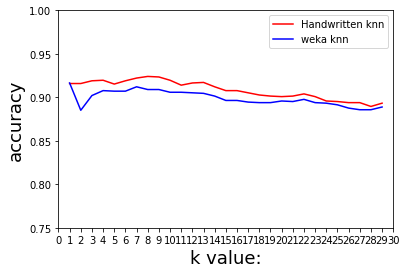

In [14]:
# 可视化展示
plt.xlabel('k value:',fontsize=18)
plt.ylabel('accuracy',fontsize=18)
x_major_locator = plt.MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0, 30)
plt.ylim(0.75, 1)
# 普通kNN分类精度
plt.plot(range(1,30),scores1,'r', label='Handwritten knn')
plt.plot(range(1,30),scores2,'b', label='weka knn')
plt.legend()
plt.show()